In [11]:
import pandas as pd
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
import astropy.units as u

import matplotlib.pyplot as plot
import matplotlib
import astropy
from matplotlib import cm
import numpy as np
import math
from matplotlib.colors import Normalize

from matplotlib import colors 


#gaia = pd.read_hdf("gaiaspectra.hdf5") 

In [272]:
#just definining shit for l8r
z = gaia['z'] * 1000 #in pc
r = gaia['R'] * 1000 #in pc
V_r = gaia['vR']
V_phi = gaia['vphi']
V_z = gaia['vz']
L_z = gaia['Lz'] *1000 #in pc


In [273]:

#using the potential described in https://arxiv.org/pdf/1611.00222.pdf section 3.2, identical to that used in their
#recent Nature paper

#defining the constants in pc
a = 6.5 * 10 **(3)
b = .26 * 10 **(3)
c = 0.7 * 10 **(3)
d = 12 * 10 **(3)
#*10**-3 for g in pc
#potential for each portion of the galaxy, where r and z are from your data

#note that this bitch is in kpc
#a log halo, a Miyamoto-Nagai disk, and a Hernquist bulge
halo = (173.2)**2 * np.log(1 + (r**2 / d**2) + (z**2 / d**2))
disk = - (4.302 * 10**(-3) * 6.3 * 10**(10)) / (np.sqrt(r**2 + (a + np.sqrt(z**2 + b**2))**2))
bulge = - (4.302 * 10**(-3) * 2.1 * 10**(10))/ (np.sqrt(r**2 + z**2) + c)

KE = .5 * (V_r**2 +V_phi**2 + V_z**2)

gaia['E'] = (halo + disk + bulge + KE)


Below this point we are doing ~actual science~, above is just setting the groundwork

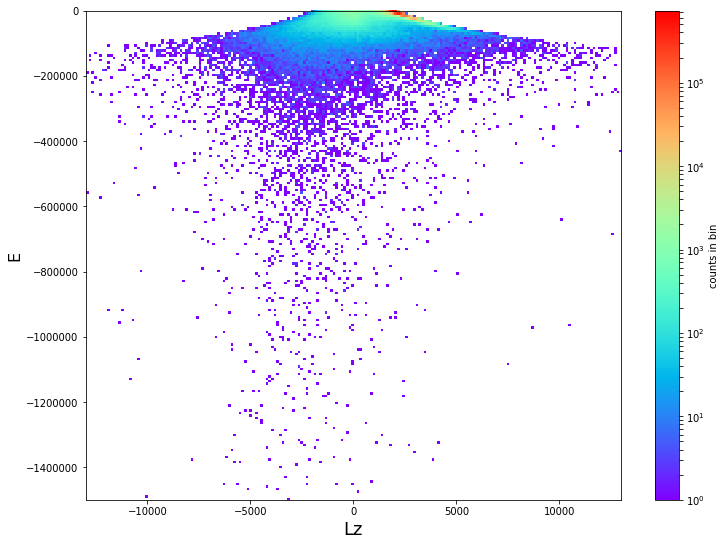

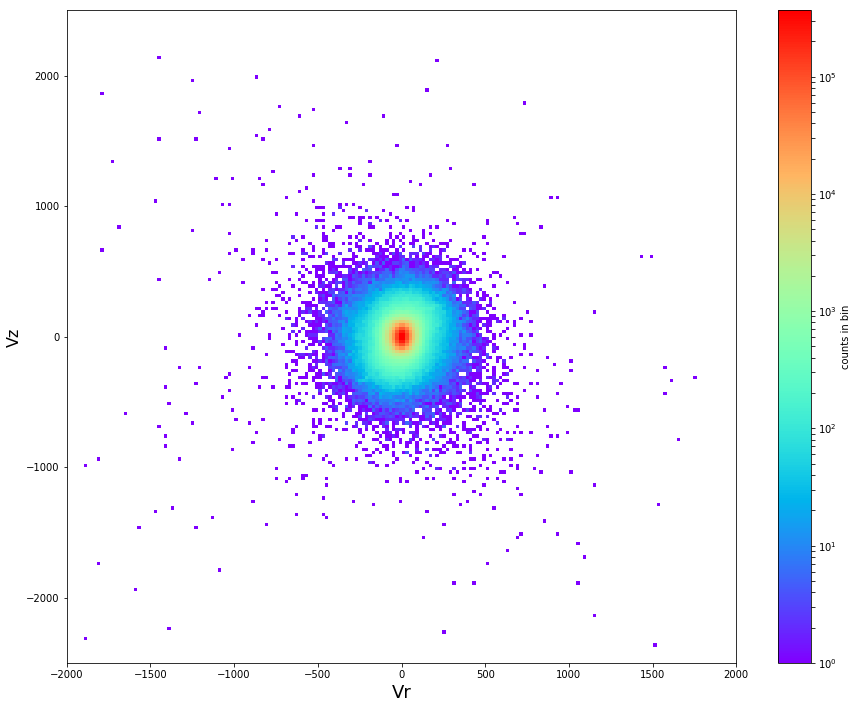

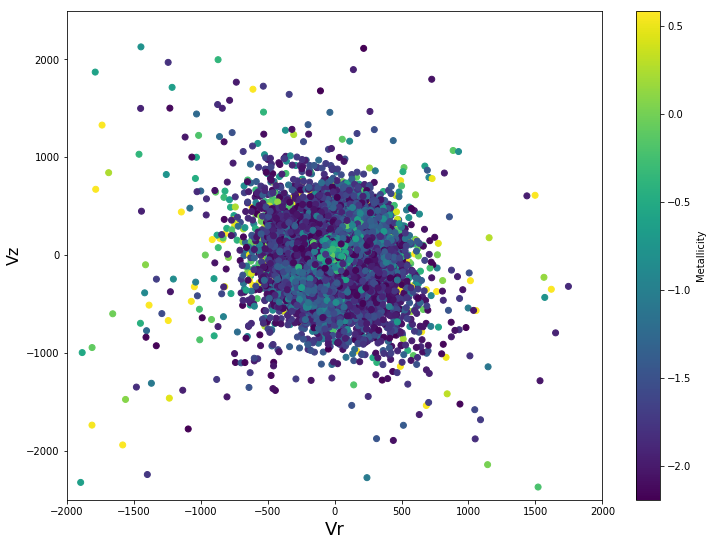

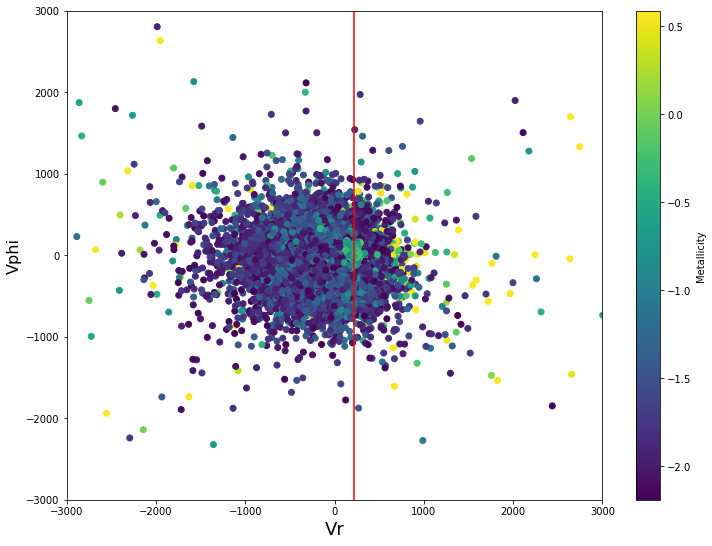

In [458]:
#this baby is all data from Jason - FULL GAIA

y= -gaia['E']
x=gaia['Lz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200), range=((-13000, 13000),(-1.5*10**6, 1*10**2)),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
#plot.xlim(-1000, 1000)
#plot.ylim(-60, 60)
cb = plot.colorbar()
cb.set_label('counts in bin')
#plot.axvline(x=0.0, color='r', linestyle='-')
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)




#this is full gaia rvs Vr Vz plot, again counts coloured - disregarding some spatter
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vz']

plot.figure(figsize=(15,12))
plot.hist2d(x, y, bins=(200,200),range=((-2000, 2000), (-2500, 2500)),
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)
#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')


#this is full gaia rvs Vr Vz plot, metallicity coloured - disregarding some spatter
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vz']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=gaia['Z'])
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)

plot.xlim(-2000, 2000)
plot.ylim(-2500, 2500)

#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')


#this is full gaia rvs Vr Vphi plot, metallicity coloured - disregarding some spatter again, GSR on here
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vphi']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=gaia['Z'])
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vphi', fontsize=16)
plot.axvline(x=220.0, color='r', linestyle='-')
plot.xlim(-3000, 3000)
plot.ylim(-3000, 3000)

#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')



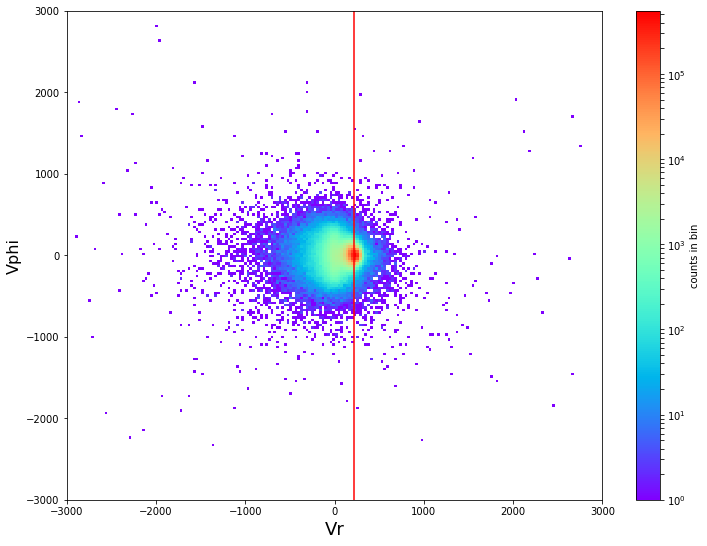

In [459]:

#this is full gaia rvs Vr Vz plot, again counts coloured - disregarding some spatter. Added in line for GSR
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vphi']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200), range=((-3000, 3000), (-3000, 3000)),
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vphi', fontsize=16)
plot.axvline(x=220.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')

From here, we isolate our sag. core

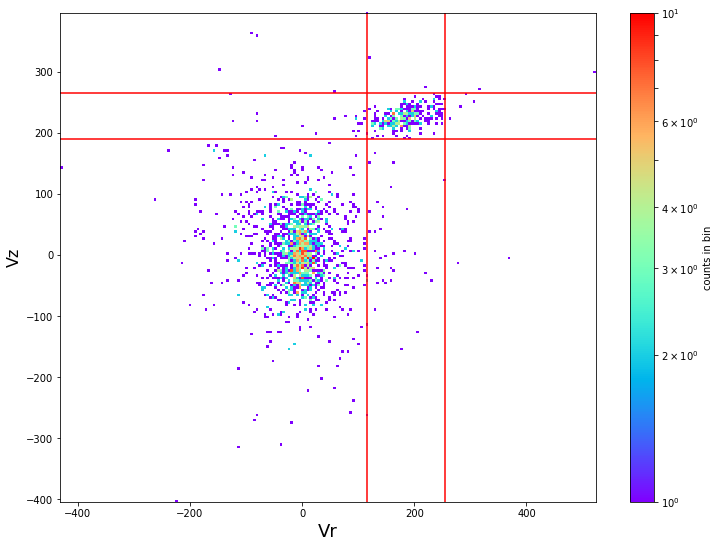

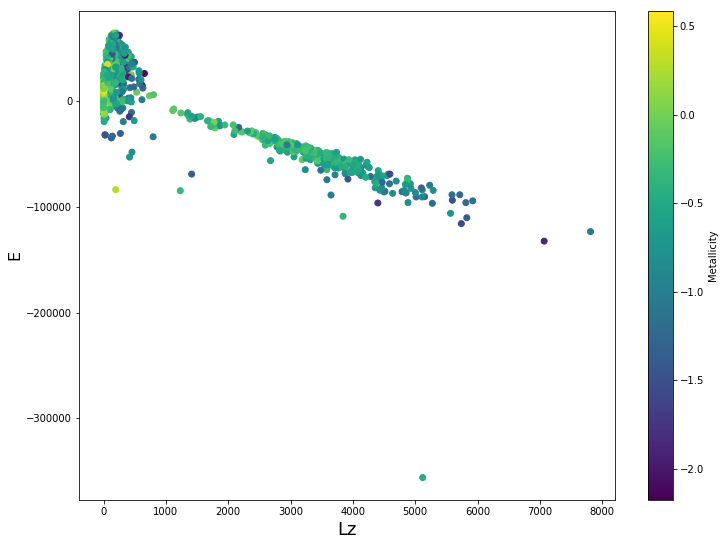

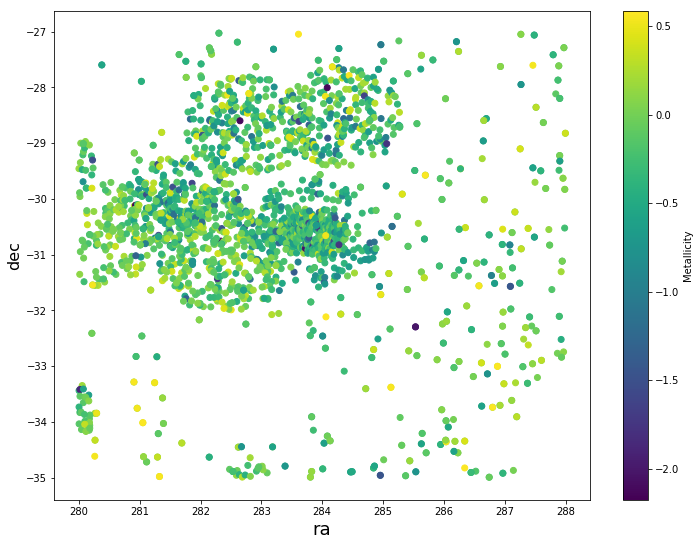

In [466]:
#this boi is just within our ~nominal sag range~ in ra/dec, from https://arxiv.org/pdf/1804.09381.pdf

#getting reasonable area for sag debris, this is from https://arxiv.org/pdf/1804.09381.pdf where I have exactly their 
#radius

data = gaia[gaia['dec'] < - 27]
data = data[data['dec'] > -35]
data = data[data['ra'] > 280]
data = data[data['ra'] < 288]

data = data.dropna()


#sag range velocities in vz and vr, note weird substructure 

y=data['vR']
x=data['vz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)
plot.axhline(y=190.0, color='r', linestyle='-')
plot.axhline(y=265.0, color='r', linestyle='-')
plot.axvline(x=255.0, color='r', linestyle='-')
plot.axvline(x=115.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')




#plotting that weird lil chunk in phase space, just to see whats up


y=-data['E']
x=data['Jz']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=data['Z'])
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)


#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')







#plotting in physical space just to see
y=data['dec']
x=data['ra']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=data['Z'])
plot.xlabel('ra', fontsize=18)
plot.ylabel('dec', fontsize=16)


#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')




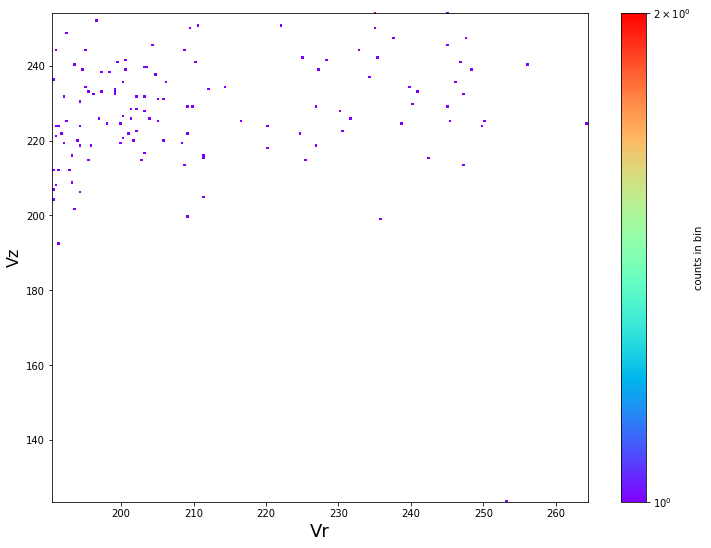

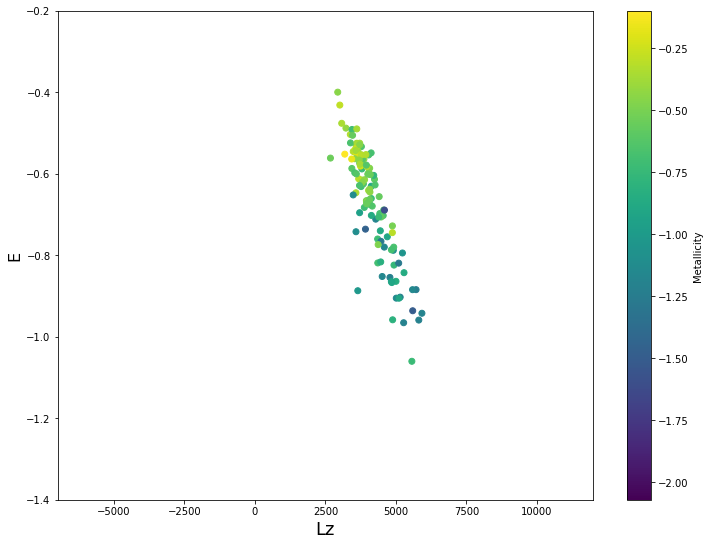

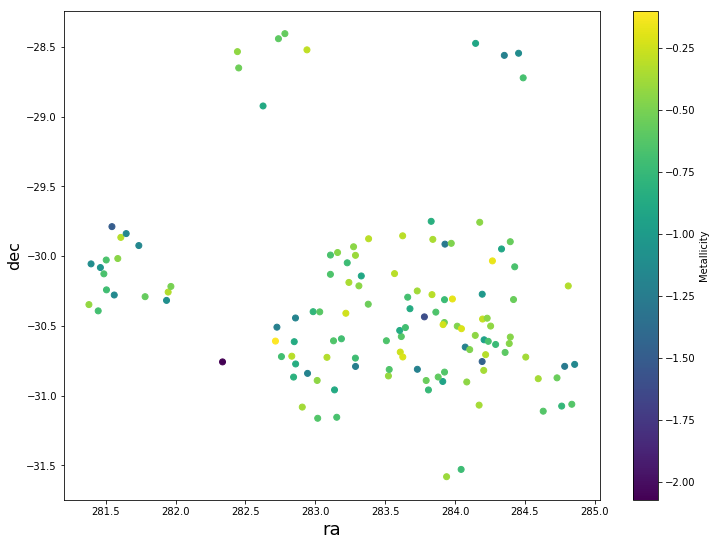

In [467]:
#setup here is cut ra/dec, cut velocity, plot E&J - this is effectively isolating the sag core 
#i.e. we are looking within the red box defined above in physical AND phase space

data = gaia[gaia['dec'] < - 27]
data = data[data['dec'] > -35]
data = data[data['ra'] > 280]
data = data[data['ra'] < 288]

data = data.dropna()


substruc = data[data['vR'] < 255]
substruc = substruc[substruc['vR'] > 115]
substruc = substruc[substruc['vz'] < 265]
substruc = substruc[substruc['vz'] > 190]


#sag range velocities in vz and vr, note weird substructure 

y=substruc['vR']
x=substruc['vz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)
cb = plot.colorbar()
cb.set_label('counts in bin')




#plotting that weird lil chunk in phase space, just to see whats up


y= - substruc['E']/(10**5)
x=substruc['Jz']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=substruc['Z'])
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)

plot.xlim(-7000, 12000)
plot.ylim(-1.4, -0.2)

#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')




#plotting in physical space just to see
y=substruc['dec']
x=substruc['ra']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=substruc['Z'])
plot.xlabel('ra', fontsize=18)
plot.ylabel('dec', fontsize=16)



#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')


Note - Sag has a radial velocity of approximately 150, Rosie selected as 100 < vhelioR < 180, so I can just check if vR for substructure fits within these parameters. below I check for the one selected based off of radius


SO below is one giant sanity check & it works out ! This sanity check is cutting based off of characteristic velocity

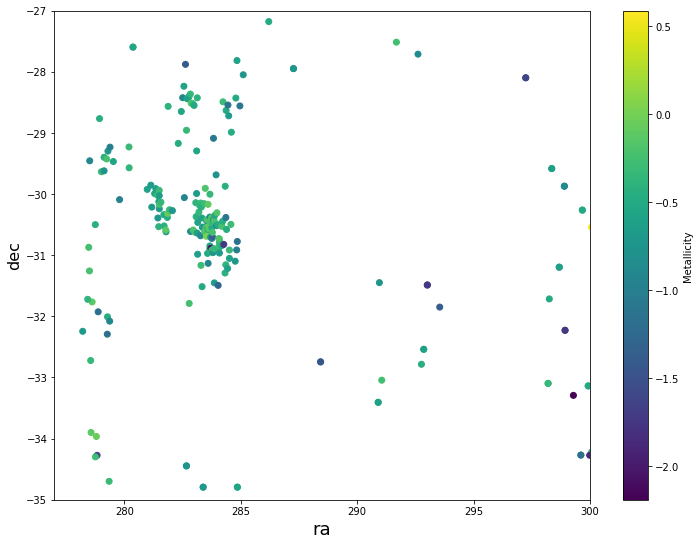

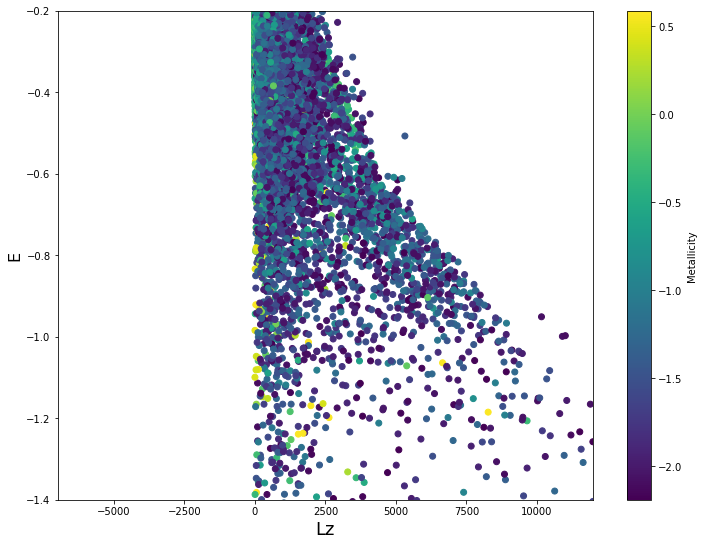

In [472]:
gaia['vhel'] = gaia['vR'] - 16.5 - 220 * np.cos(gaia['b']) * np.sin(gaia['l'])

sagvhel = gaia[gaia['vhel'] < 180]
sagvhel = sagvhel[sagvhel['vhel'] > 100]


#plotting in physical space just to see
y=sagvhel['dec']
x=sagvhel['ra']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=sagvhel['Z'])
plot.xlabel('ra', fontsize=18)
plot.ylabel('dec', fontsize=16)

plot.xlim(277, 300)
plot.ylim(-35, -27)



#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')


y= - sagvhel['E']/(10**5)
x=sagvhel['Jz']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=sagvhel['Z'])
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)

plot.xlim(-7000, 12000)
plot.ylim(-1.4, -0.2)

#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')

Now just going back to ALL gaia data, making cuts in E&Lz akin to Yang's K-Giant selection, seeing if we get streams

In [473]:
#Here I select based off of the general characteristics of the E, Lz plot from Yang. I also make a metallicity cut

streams = gaia[-gaia['E'] / 10**5 > -1.3]
streams = streams[-streams['E'] / 10**5 < -0.1]
streams = streams[streams['Lz'] > -1000]
streams = streams[streams['Lz'] < 5000]
streams = streams[streams['Z'] < -0.2]



Text(0,0.5,'dec')

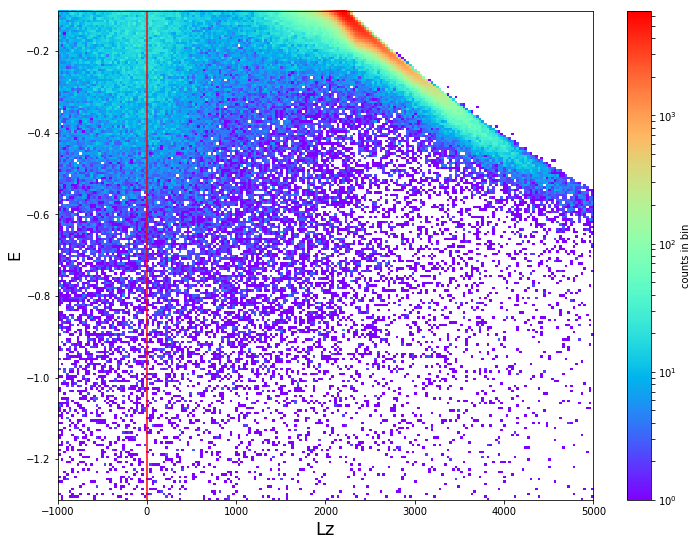

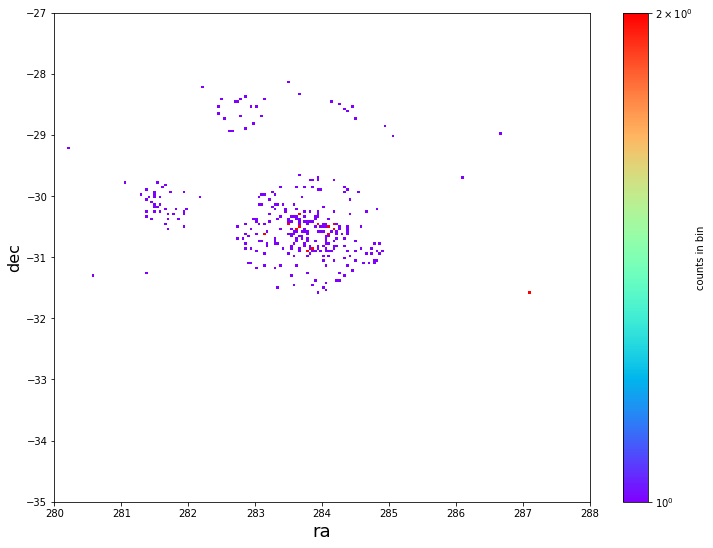

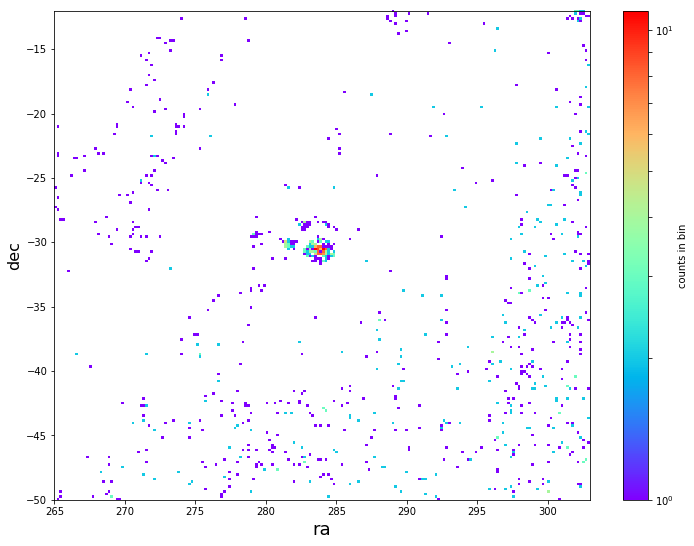

In [474]:
#creating E, Lz plots from this culled herd. From there, seeing how this corresponds to physical space
#show/see Topcat for the whole sky plot, these below are zoomed on the sag region



y= -streams['E']/10**5

x = streams['Lz']


plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
#plot.xlim(-1000, 1000)
#plot.ylim(-60, 60)
cb = plot.colorbar()
cb.set_label('counts in bin')
plot.axvline(x=0.0, color='r', linestyle='-')
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)




#plotting in physical space just to see
y=streams['dec']
x=streams['ra']


#zoomed in around where sag is
plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200), range=((280,288),(-35,-27)),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')

#plot.xlim(-1000, 1000)
#plot.ylim(-60, 60)
cb = plot.colorbar()
cb.set_label('counts in bin')
plot.axvline(x=0.0, color='r', linestyle='-')
plot.xlabel('ra', fontsize=18)
plot.ylabel('dec', fontsize=16)







#zoomed out somewhat, plus or minus 15 degrees in either direction
plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200), range=((265,303),(-50,-12)),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')

#plot.xlim(-1000, 1000)
#plot.ylim(-60, 60)
cb = plot.colorbar()
cb.set_label('counts in bin')
plot.axvline(x=0.0, color='r', linestyle='-')
plot.xlabel('ra', fontsize=18)
plot.ylabel('dec', fontsize=16)






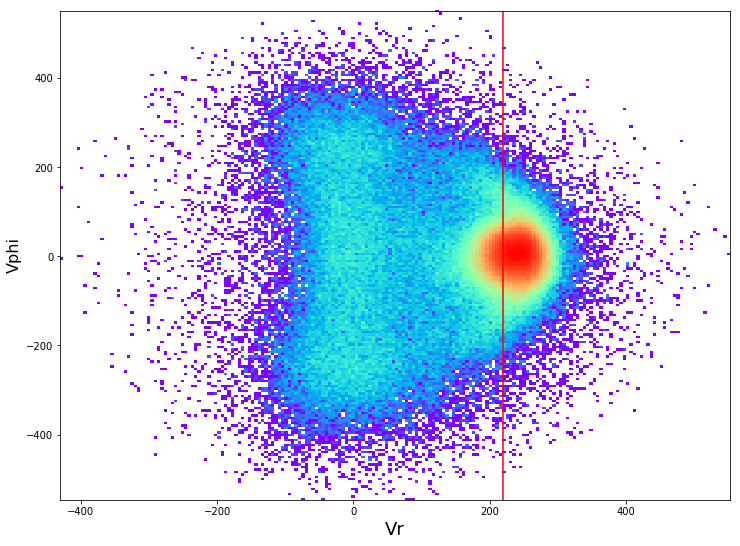

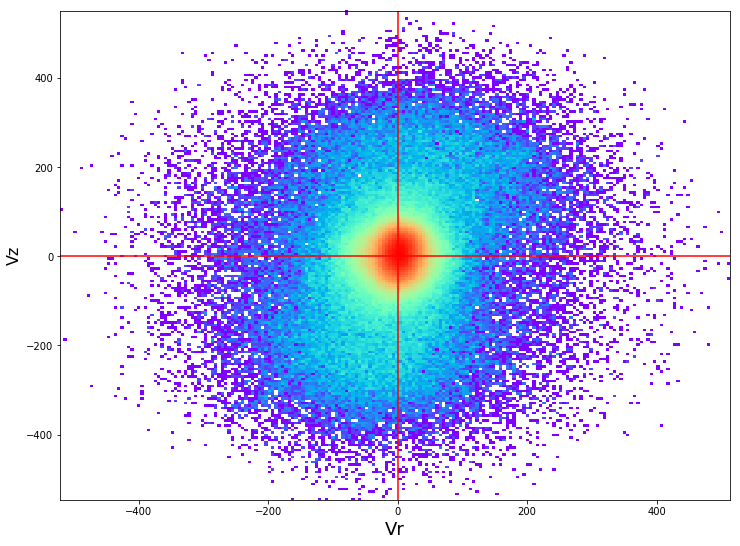

In [475]:
#the data from the cut in E, Lz (to find streams)above, plotting Vr & Vphi, see a slow rotator & some retrograde motion
#red line is lsr

y=streams['vR']
x=streams['vphi']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.axvline(x=220.0, color='r', linestyle='-')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vphi', fontsize=16)
cb.set_label('counts in bin')



#p much same as above, vz and vr. here we have selected 0,0 as useful (halo stars). Interesting sorta wave thing
y=streams['vR']
x=streams['vz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.axvline(x=0.0, color='r', linestyle='-')
plot.axhline(y=0.0, color='r', linestyle='-')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)
cb.set_label('counts in bin')


Below is scratch work, more or less - stuff that may be useful later but arent' quite yet

In [ ]:
#getting reasonable area for sag debris, this is from https://arxiv.org/pdf/1804.09381.pdf where I have given myself
# +/- 10 degrees in dec, +/- 10 in RA, gives us 35342 rows, predominantly apogee & Raveon

data = gaia[gaia['dec'] < - 17]
data = data[data['dec'] > -45]
data = data[data['ra'] > 270]
data = data[data['ra'] < 298]

data = data.dropna()
#brings this down to 26514 rows



#from way earlier

#cut on ra and dec, then the velocity Rosie supplies in here
#http://adsbit.harvard.edu/cgi-bin/nph-iarticle_query?1997AJ....113..634I&defaultprint=YES&filetype=.pdf


data = gaia[gaia['dec'] < - 27]
data = data[data['dec'] > -35]
data = data[data['ra'] > 280]
data = data[data['ra'] < 288]

data = data.dropna()


substruc = data[data['vhel'] < 180]
substruc = substruc[substruc['vhel'] > 100]



#sag range velocities in vz and vr, note weird substructure 

y=substruc['vR']
x=substruc['vz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)
cb = plot.colorbar()
cb.set_label('counts in bin')




#plotting that weird lil chunk in phase space, just to see whats up

y= - substruc['E']/(10**5)
x= substruc['Jz']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=substruc['Z'])
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)

plot.xlim(-7000, 12000)
plot.ylim(-1.4, -0.22)

#plotting in physical space just to see
y=substruc['dec']
x=substruc['ra']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=substruc['Z'])
plot.xlabel('ra', fontsize=18)
plot.ylabel('dec', fontsize=16)



#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')


#try to plot of energy vs angular momentum in orbital plane (i.e. Lphi...?)


#scaling some
y= -data['E'] 
#x=gaia['vphi'] * gaia['R']# * 1000
x = data['Lz']
plot.figure(figsize=(12,9))
plot.scatter(x, y, c = data['Z'])
#plot.ylim(-1.5*10**5, -2*10**4)
#plot.xlim(-5000, 5000)
#plot.xlim(-4000, 4000)
#plot.ylim(0,2*10**5)
cb = plot.colorbar()
cb.set_label('metallicity')
plot.axvline(x=0.0, color='r', linestyle='-')
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)


#basically above, coloured by density now
y=-data['E']
x=data['Lz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)
plot.axvline(x=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')

#this is full gaia rvs Vr Vz plot, again counts coloured - disregarding some spatter. Added in line for GSR
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vphi']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200), range=((-3000, 3000), (-3000, 3000)),
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vphi', fontsize=16)
plot.axvline(x=220.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')
